In [3]:
import matplotlib.pyplot as plt
from scipy import spatial
import numpy as np

from importlib import reload

%reload_ext autoreload
%autoreload 2
    
import pyturb
reload(pyturb)

from time import sleep, perf_counter

import sys
sys.path.append('/Users/00075868/MyCodes/AnalysisTools/')
import analysistools
import gc

In [20]:
# Tools to measure velocity fields
mturb = pyturb.measure_turbulence.MeasureVelocityField()
# Tools to generate gridded velocity fields given particle data
gt = pyturb.GriddingTools()
# Read snapshot data
snap=analysistools.SnapshotTools(snapfilename="/Volumes/ChrisPowerHardDrive1/GIZMO-3k/NewMDCLUSTER_0001/snap_128",snapfileformat="HDF5")
# Read halo catalogue data
halos=analysistools.HaloTools(halocatfilename="/Volumes/ChrisPowerHardDrive1/GIZMO-3k/NewMDCLUSTER_0001/GIZMO-NewMDCLUSTER_0001.snap_128.z0.000",halocatfileformat="AHF")

Assuming positions are type float32
Assuming particle IDs are type 32 bit


Read in  5924246 particles


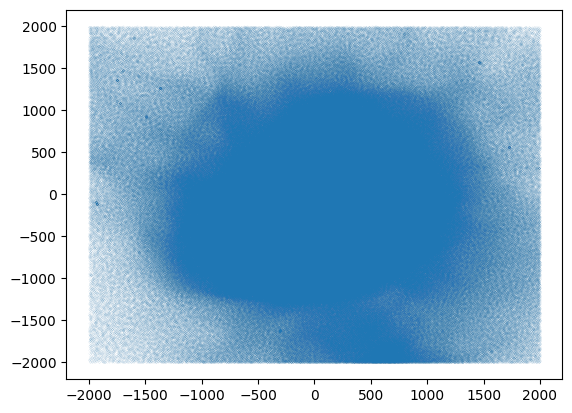

In [30]:
# snap.ReadSnapshot()
# halos.ReadHaloCatalogue()
# snap.LoadParticlesByType(part_type='gas')
# diffpos=snap.gas.pos-halos.GroupPos[0]
# diffvel=snap.gas.vel-halos.GroupVel[0]
# rcut=2e3
print(f"Read in {snap.gas.pos.shape[0]:8d} particles") 
i=np.arange(snap.gas.pos.shape[0])
ii=(diffpos[:,0]<rcut) & (diffpos[:,0]>-rcut)
jj=(diffpos[ii][:,1]<rcut) & (diffpos[ii][:,1]>-rcut)
kk=(diffpos[ii][jj][:,2]<rcut) & (diffpos[ii][jj][:,2]>-rcut)

# keepid=np.where((diffpos[:,0]**2+diffpos[:,1]**2+diffpos[:,2]**2)<rcut*rcut)
plt.scatter(diffpos[ii][jj][kk][:,0],diffpos[ii][jj][kk][:,1],s=0.001)

In [35]:
grid_limits =  np.array([-1,1,-1,1,-1,1], dtype=np.float64)*rcut
grid_size = (256,256,256)
tstart=perf_counter()
vel_field_smooth = gt.smooth_to_grid(diffpos[ii][jj][kk], diffvel[ii][jj][kk], grid_size, grid_limits, method="CIC")
tfinish=perf_counter()
print(f"Finished smoothing velocity field from point data in {tfinish-tstart:.4f}\n")

Finished smoothing velocity field from point data in 1.2994



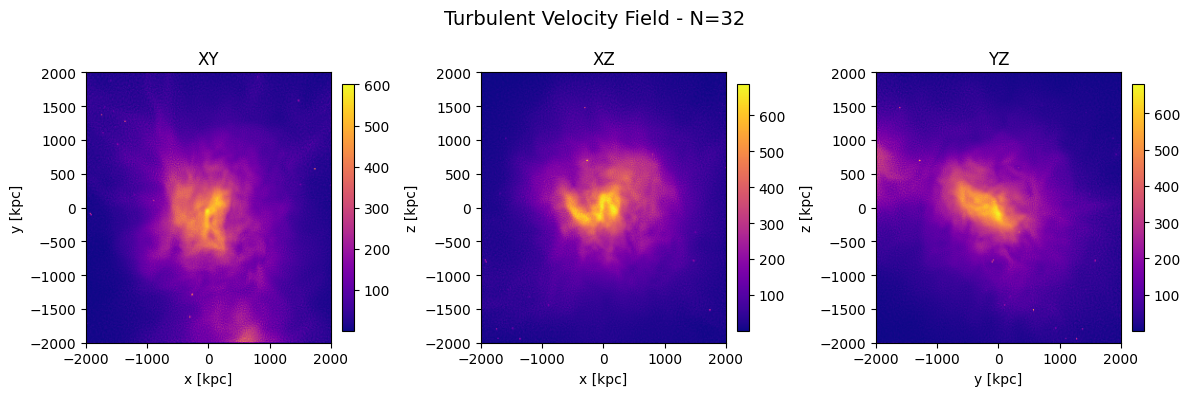

In [36]:
fig, axes = gt.plot_3d_projections(vel_field_smooth, grid_limits, mode='projection', slice_width=3, projection='mean', cmap='plasma', units='kpc', title="Turbulent Velocity Field - N=32")


In [37]:
# Compute for the velocity field generated by pyturb...
k,pk,_=mturb.fft().compute_power_spectrum(vel_field_smooth, box_size=2*rcut, component='energy', method='radial')


16777216
4528855817189.422 4528855817189.421


/var/folders/5j/77cr87r17bd1d4qg5mt7bc1hp4wxl1/T/ipykernel_76497/1932439851.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


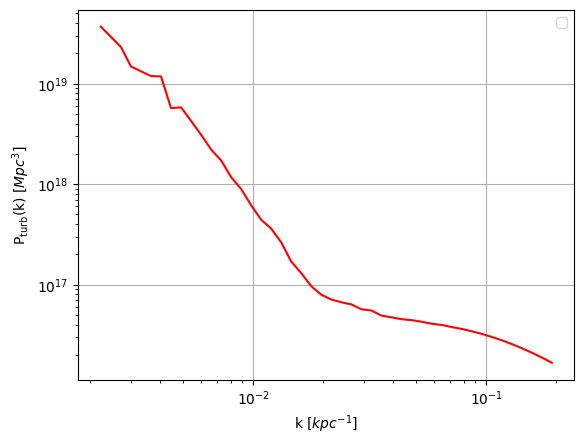

In [39]:
plt.xlabel(r"k [$kpc^{-1}$]")
plt.ylabel(r"P$_\text{turb}$(k) [$Mpc^{3}$]")
plt.xscale("log")
plt.yscale("log")
plt.plot(k,pk,color="red")
plt.grid(True)
plt.legend()

In [18]:
# Compute for the velocity field generated by pyturb...
k,pk=mturb.wavelets().local_power_spectrum(vel_field_smooth, box_size=2*rcut)


ValueError: x and y must have same first dimension, but have shapes (10,) and (3, 10)

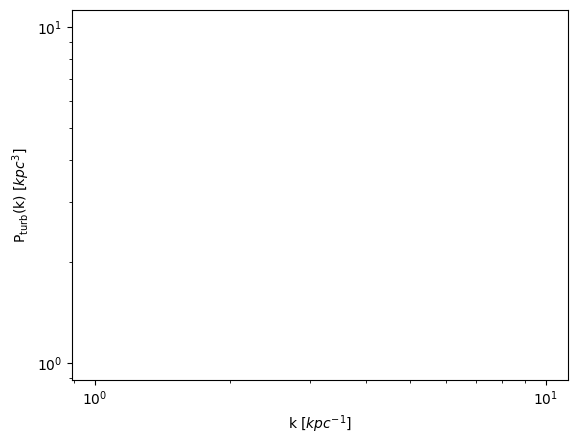

In [19]:
plt.xlabel(r"k [$kpc^{-1}$]")
plt.ylabel(r"P$_\text{turb}$(k) [$kpc^{3}$]")
plt.xscale("log")
plt.yscale("log")
plt.plot(k,pk,color="red")
plt.grid(True)
plt.legend()